In [1]:
# Import 3rd party libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

# Cleaning, Removing and Merging data
Fristly, opening the solar_data and selecting only needed columns and renaming them

In [2]:
solar_data = gpd.read_file('solarto-map - 4326.shp')
solar_data_2957 = solar_data.to_crs(epsg=2957)
solar_data_2957.head()

,_id1,objecti2,structu3,roofsiz4,rooftop5,roof_si6,annual_7,system_8,system_9,first_y10,f_25_ye11,payback12,annual_13,total_g14,trees_g15,cars_of16,geometry
0,1,1,38 Westleigh Cres - Structure 1,117.0,1259.0,44.0,5627,4.893043,14700,881,39262,10.0,394,9847,164,2,"POLYGON ((2555348.668 5152952.976, 2555340.241..."
1,2,2,36 Westleigh Cres - Structure 1,101.0,1087.0,51.0,6012,5.227826,14100,941,41936,9.0,421,10521,175,2,"POLYGON ((2555329.515 5152962.112, 2555325.746..."
2,3,3,34 Westleigh Cres - Structure 1,74.0,797.0,32.0,4061,3.531304,10600,636,28343,10.0,284,7107,118,2,"POLYGON ((2555333.993 5152991.670, 2555342.687..."
3,4,4,34 Westleigh Cres - Structure 2,42.0,452.0,12.0,1480,1.286957,3900,232,10339,10.0,104,2590,43,1,"POLYGON ((2555332.030 5152976.610, 2555330.020..."
4,5,5,40 Westleigh Cres - Structure 1,79.0,850.0,14.0,1775,1.543478,4600,278,12389,10.0,124,3106,52,1,"POLYGON ((2555355.296 5152950.505, 2555364.931..."


In [3]:
# Define old to new column names
column_selection = {
    'structu3': 'Street',
    'roofsiz4': 'Roof_size',
    'annual_7': 'Annual_electricity_generation_k',
    'system_8': 'System_size',
    'system_9': 'System_cost',
    'first_y10': '1_year_bill_savings',
    'f_25_ye11': '25_year_bill_savings',
    'payback12': 'Payback_period',
    'annual_13': 'Annual_ghg_reduction_kg',
    'geometry': 'Geometry'
}

# Select and rename columns in one step, creating the final DataFrame
solar_final = solar_data_2957.rename(columns=column_selection)[list(column_selection.values())]

# Display the first few rows of the subsetted data to verify
solar_final.head()


,Street,Roof_size,Annual_electricity_generation_k,System_size,System_cost,1_year_bill_savings,25_year_bill_savings,Payback_period,Annual_ghg_reduction_kg,Geometry
0,38 Westleigh Cres - Structure 1,117.0,5627,4.893043,14700,881,39262,10.0,394,"POLYGON ((2555348.668 5152952.976, 2555340.241..."
1,36 Westleigh Cres - Structure 1,101.0,6012,5.227826,14100,941,41936,9.0,421,"POLYGON ((2555329.515 5152962.112, 2555325.746..."
2,34 Westleigh Cres - Structure 1,74.0,4061,3.531304,10600,636,28343,10.0,284,"POLYGON ((2555333.993 5152991.670, 2555342.687..."
3,34 Westleigh Cres - Structure 2,42.0,1480,1.286957,3900,232,10339,10.0,104,"POLYGON ((2555332.030 5152976.610, 2555330.020..."
4,40 Westleigh Cres - Structure 1,79.0,1775,1.543478,4600,278,12389,10.0,124,"POLYGON ((2555355.296 5152950.505, 2555364.931..."


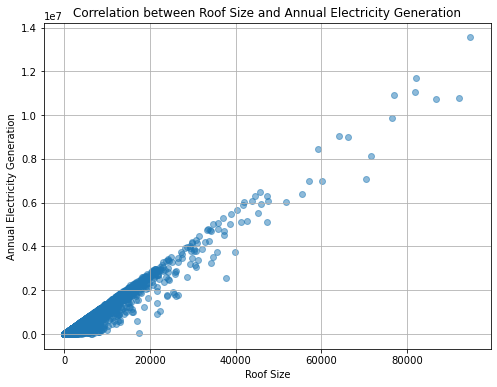

In [4]:
# Plotting correlation between 'Roof_size' and 'Annual_electricity_generation_k'
plt.figure(figsize=(8, 6))
plt.scatter(solar_final['Roof_size'], solar_final['Annual_electricity_generation_k'], alpha=0.5)
plt.title('Correlation between Roof Size and Annual Electricity Generation')
plt.xlabel('Roof Size')
plt.ylabel('Annual Electricity Generation')
plt.grid(True)
plt.show()

In [5]:
print('Missingness before modification:')
print(solar_final.isnull().sum())

Missingness before modification:
Street                             0
Roof_size                          0
Annual_electricity_generation_k    0
System_size                        0
System_cost                        0
1_year_bill_savings                0
25_year_bill_savings               0
Payback_period                     0
Annual_ghg_reduction_kg            0
Geometry                           0
dtype: int64


Then, the postal code data is taken to retrive the geometry data and postal code itself

In [6]:
postal_data = gpd.read_file('ONldu.shp')
postal_data_2957 = postal_data.to_crs(epsg=2957)
postal_data_2957.head()

,PCA_ID,POSTALCODE,PROV,MAF_ID,PREC_CODE,PCA_COUNT,DOM_PCA,MULTI_PC,DEL_M_ID,LONGITUDE,LATITUDE,geometry
0,180000001,L4S1M4,ON,350005325,2,2,0,0,SS0315,-79.415566,43.894633,"POLYGON ((2555492.847 5189600.571, 2555498.935..."
1,180000002,K1Y3R6,ON,350002120,2,1,1,0,LC0011,-75.721267,45.398581,"POLYGON ((2786162.707 5462032.505, 2786157.722..."
2,180000003,L4S1M5,ON,350005325,2,1,1,0,SS0315,-79.401105,43.900182,"POLYGON ((2556767.252 5190821.386, 2556791.926..."
3,180000004,L4S1M6,ON,350005325,2,1,1,0,None,-79.389156,43.901523,"POLYGON ((2557385.063 5190891.433, 2557344.269..."
4,180000005,L4S1M7,ON,350005325,2,3,0,0,SS0315,-79.415879,43.892396,"POLYGON ((2555548.700 5189450.056, 2555553.669..."


In [9]:
# Define old to new column names
postal_data_2957 = postal_data_2957[['POSTALCODE', 'geometry']].rename(columns={
    'POSTALCODE': 'Postal_code',
    'geometry': 'Geometry'
})

postal_data_2957.head()

,Postal_code,Geometry
0,L4S1M4,"POLYGON ((2555492.847 5189600.571, 2555498.935..."
1,K1Y3R6,"POLYGON ((2786162.707 5462032.505, 2786157.722..."
2,L4S1M5,"POLYGON ((2556767.252 5190821.386, 2556791.926..."
3,L4S1M6,"POLYGON ((2557385.063 5190891.433, 2557344.269..."
4,L4S1M7,"POLYGON ((2555548.700 5189450.056, 2555553.669..."


Lastly, two data sets should be joined, solar_final and postal_data_2957

In [10]:
# Assuming 'Geometry' is the geometry column in postal_data_2957
postal_data_2957 = postal_data_2957.set_geometry('Geometry')
solar_final = solar_final.set_geometry('Geometry')

# Perform spatial join using the 'within' operation
joined_solar = gpd.sjoin(solar_final, postal_data_2957, how='left', op='within')
joined_solar.head()

C:\Users\zereb\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,Street,Roof_size,Annual_electricity_generation_k,System_size,System_cost,1_year_bill_savings,25_year_bill_savings,Payback_period,Annual_ghg_reduction_kg,Geometry,index_right,Postal_code
0,38 Westleigh Cres - Structure 1,117.0,5627,4.893043,14700,881,39262,10.0,394,"POLYGON ((2555348.668 5152952.976, 2555340.241...",369319.0,M8W3Z7
1,36 Westleigh Cres - Structure 1,101.0,6012,5.227826,14100,941,41936,9.0,421,"POLYGON ((2555329.515 5152962.112, 2555325.746...",369319.0,M8W3Z7
2,34 Westleigh Cres - Structure 1,74.0,4061,3.531304,10600,636,28343,10.0,284,"POLYGON ((2555333.993 5152991.670, 2555342.687...",369319.0,M8W3Z7
3,34 Westleigh Cres - Structure 2,42.0,1480,1.286957,3900,232,10339,10.0,104,"POLYGON ((2555332.030 5152976.610, 2555330.020...",369319.0,M8W3Z7
4,40 Westleigh Cres - Structure 1,79.0,1775,1.543478,4600,278,12389,10.0,124,"POLYGON ((2555355.296 5152950.505, 2555364.931...",369319.0,M8W3Z7


In [11]:
# Reorder the columns
columns = list(joined_solar.columns)
columns.insert(columns.index('Roof_size'), columns.pop(columns.index('Postal_code')))
joined_solar = joined_solar[columns]

# Remove the 'index_right' column
joined_solar_final = joined_solar.drop('index_right', axis=1)
joined_solar_final.head()

,Street,Postal_code,Roof_size,Annual_electricity_generation_k,System_size,System_cost,1_year_bill_savings,25_year_bill_savings,Payback_period,Annual_ghg_reduction_kg,Geometry
0,38 Westleigh Cres - Structure 1,M8W3Z7,117.0,5627,4.893043,14700,881,39262,10.0,394,"POLYGON ((2555348.668 5152952.976, 2555340.241..."
1,36 Westleigh Cres - Structure 1,M8W3Z7,101.0,6012,5.227826,14100,941,41936,9.0,421,"POLYGON ((2555329.515 5152962.112, 2555325.746..."
2,34 Westleigh Cres - Structure 1,M8W3Z7,74.0,4061,3.531304,10600,636,28343,10.0,284,"POLYGON ((2555333.993 5152991.670, 2555342.687..."
3,34 Westleigh Cres - Structure 2,M8W3Z7,42.0,1480,1.286957,3900,232,10339,10.0,104,"POLYGON ((2555332.030 5152976.610, 2555330.020..."
4,40 Westleigh Cres - Structure 1,M8W3Z7,79.0,1775,1.543478,4600,278,12389,10.0,124,"POLYGON ((2555355.296 5152950.505, 2555364.931..."


In [ ]:
# Initialize the base plot
#ax = joined_solar_final.plot()

# Define a color map
#color_map = plt.cm.get_cmap('viridis')  # Choose a color map (e.g., 'viridis', 'coolwarm', 'rainbow', etc.)

# Iterate through the indices and plot polygons with different colors based on the index 'i'
#for i in joined_solar_final.index:
 #   color = color_map(i / len(joined_solar_final))  # Assign a color based on the index
  #  joined_solar_final.loc[[i], 'Geometry'].plot(ax=ax, color=color, edgecolor='black')

# Display the plot
#plt.show() 

In [14]:
# Filter columns
filtered = joined_solar_final[['Postal_code', 'Annual_electricity_generation_k', 'Annual_ghg_reduction_kg', 'Geometry']]

# Aggregate by Postal_code and Geometry and sum up the values
aggregated = filtered.groupby(['Postal_code', 'Geometry']).sum().reset_index()
aggregated.head()

,Postal_code,Geometry,Annual_electricity_generation_k,Annual_ghg_reduction_kg
0,L4L1V8,"POLYGON ((2547364.118 5170869.481, 2547346.375...",22582,1581
1,L4L1V8,"POLYGON ((2547392.768 5170882.054, 2547381.550...",31322,2193
2,L4L1V8,"POLYGON ((2547376.061 5170907.604, 2547365.712...",23301,1631
3,L5M0T5,"POLYGON ((2550000.595 5159323.085, 2550000.095...",142976,10008
4,L5M0T5,"POLYGON ((2550025.953 5159392.196, 2550027.215...",58184,4073


In [15]:
unique_postal_codes = aggregated['Postal_code'].unique()
print(unique_postal_codes)

['L4L1V8' 'L5M0T5' 'M1B0A2' ... 'M9W7K3' 'M9W7K4' 'M9W7K7']


In [17]:
# Group by Postal_code and Geometry, summing up the other columns
grouped = joined_solar_final.groupby(['Postal_code', 'Geometry']).agg({
    'Annual_electricity_generation_k': 'sum',
    'Annual_ghg_reduction_kg': 'sum'
}).reset_index()

# Then, group only by Postal_code, summing the grouped values
merged = grouped.groupby('Postal_code').agg({
    'Annual_electricity_generation_k': 'sum',
    'Annual_ghg_reduction_kg': 'sum'
}).reset_index()
merged.head()

,Postal_code,Annual_electricity_generation_k,Annual_ghg_reduction_kg
0,L4L1V8,77205,5405
1,L5M0T5,201160,14081
2,M1B0A2,1826520,127856
3,M1B0A3,239890,16790
4,M1B0A4,8725,611


In [21]:
unique_postal = merged['Postal_code'].unique()
print(unique_postal)
total_unique_count = len(unique_postal)
print("Total unique Postal_code values:", total_unique_count)

['L4L1V8' 'L5M0T5' 'M1B0A2' ... 'M9W7K3' 'M9W7K4' 'M9W7K7']
Total unique Postal_code values: 41045


In [22]:
# Extract the first three letters of the Postal_code column
merged['Abbreviated_Postal_code'] = merged['Postal_code'].str[:3]

# Group by the abbreviated Postal_code and sum the other columns
grouped_abbreviated = merged.groupby('Abbreviated_Postal_code').agg({
    'Annual_electricity_generation_k': 'sum',
    'Annual_ghg_reduction_kg': 'sum'
}).reset_index()

grouped_abbreviated.head()

,Abbreviated_Postal_code,Annual_electricity_generation_k,Annual_ghg_reduction_kg
0,L4L,77205,5405
1,L5M,201160,14081
2,M1B,200431782,14030251
3,M1C,129826652,9087895
4,M1E,131712672,9219883


In [23]:
unique_codes = grouped_abbreviated['Abbreviated_Postal_code'].unique()
print(unique_codes)
total_unique_count = len(unique_codes)
print("Total unique Postal_code values:", total_unique_count)

['L4L' 'L5M' 'M1B' 'M1C' 'M1E' 'M1G' 'M1H' 'M1J' 'M1K' 'M1L' 'M1M' 'M1N'
 'M1P' 'M1R' 'M1S' 'M1T' 'M1V' 'M1W' 'M1X' 'M2H' 'M2J' 'M2K' 'M2L' 'M2M'
 'M2N' 'M2P' 'M2R' 'M3A' 'M3B' 'M3C' 'M3H' 'M3J' 'M3K' 'M3L' 'M3M' 'M3N'
 'M4A' 'M4B' 'M4C' 'M4E' 'M4G' 'M4H' 'M4J' 'M4K' 'M4L' 'M4M' 'M4N' 'M4P'
 'M4R' 'M4S' 'M4T' 'M4V' 'M4W' 'M4X' 'M4Y' 'M5A' 'M5B' 'M5C' 'M5E' 'M5G'
 'M5H' 'M5J' 'M5K' 'M5L' 'M5M' 'M5N' 'M5P' 'M5R' 'M5S' 'M5T' 'M5V' 'M6A'
 'M6B' 'M6C' 'M6E' 'M6G' 'M6H' 'M6J' 'M6K' 'M6L' 'M6M' 'M6N' 'M6P' 'M6R'
 'M6S' 'M7A' 'M8V' 'M8W' 'M8X' 'M8Y' 'M8Z' 'M9A' 'M9B' 'M9C' 'M9L' 'M9M'
 'M9N' 'M9P' 'M9R' 'M9V' 'M9W']
Total unique Postal_code values: 101
